In [3]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
from scipy.signal import find_peaks
import json
import numpy as np
import pickle
import resync as rs
from testing import *

fs = 160

In [4]:
session = 'ALTAI_20240822_SESSION_00'
path = '/Volumes/data2/eTheremin/ALTAI/'+ session + '/positions'

In [5]:
folder = '/Volumes/data2/eTheremin/ALTAI/'+ session +'/'

#data = np.load(folder+'headstage_0/data_0.005.npy', allow_pickle=True)
features = np.load(folder+'headstage_0/features_0.005.npy', allow_pickle=True)
#gc = np.load(folder+'headstage_0/good_clusters.npy', allow_pickle=True) 



In [6]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
file_path = folder + 'headstage_0/tt.pkl'

with open(file_path, 'rb') as file:
    tt = pickle.load(file)

In [7]:
tt

{'tones': array([1287., 1111., 1287., ..., 4832., 5598., 6484.]),
 'triggers': [134577,
  141897,
  157457,
  159297,
  166257,
  169257,
  174737,
  179937,
  183137,
  191417,
  195297,
  203577,
  205697,
  208097,
  211457,
  229257,
  233777,
  239217,
  244457,
  246137,
  248057,
  254777,
  257217,
  269577,
  271457,
  299937,
  320217,
  324137,
  348297,
  359777,
  381897,
  385697,
  386217,
  386417,
  386937,
  388257,
  393897,
  410577,
  412617,
  418257,
  422937,
  424457,
  425057,
  429537,
  437217,
  440777,
  449417,
  465297,
  475857,
  489337,
  489537,
  489737,
  490257,
  490457,
  490617,
  492737,
  496457,
  524417,
  566417,
  567737,
  568457,
  575417,
  596937,
  601457,
  611417,
  647057,
  663897,
  681377,
  686777,
  728217,
  745257,
  753897,
  760457,
  761937,
  764217,
  776937,
  818576,
  836776,
  836936,
  837176,
  844656,
  849736,
  850256,
  851576,
  856856,
  866936,
  897896,
  898096,
  902056,
  902216,
  903176,
  928456,
  

In [8]:
features = create_tt_v(tt)

: 

In [23]:
positions = rs.load_positions_file(path)
positions = [file for file in positions if file != ""]



In [24]:
import os
# Chemin du dossier

# Vérification de l'existence du dossier
if os.path.exists(path):
    # Liste de tous les fichiers dans le dossier
    fichiers = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    print(fichiers)

['positions_playback_01_ALTAI_SESSION_00_20240806.bin', 'positions_playback_02_ALTAI_SESSION_00_20240806.bin', 'positions_playback_03_ALTAI_SESSION_00_20240806.bin', 'positions_playback_04_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_01_ALTAI_SESSION_00_20240806.bin', 'positions_playback_05_ALTAI_SESSION_00_20240806.bin', 'positions_tail_00_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_02_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_03_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_06_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_04_ALTAI_SESSION_00_20240806.bin', 'positions_tracking_05_ALTAI_SESSION_00_20240806.bin']


In [25]:
all_positions = []
for fichier in fichiers :
    p = np.fromfile(path+'/'+fichier, dtype=np.int32)
    all_positions.append(p)

In [26]:
p = np.hstack(all_positions)
print(len(p))

1098334


In [27]:
x_p = p[np.arange(0, len(p), step=2)]
y_p = p[np.arange(1, len(p), step=2)]
clean_x_p = rs.clean_positions(x_p)

In [36]:
import json

# Chemin vers votre fichier JSON
json_path = folder+'/session_ALTAI_SESSION_00_20240806.json'

# Charger le fichier JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Dictionnaires pour stocker les valeurs de 'Positions_fn' et 'playback' Positions_fn
positions_tracking = {}
positions_playback = {}

# Parcourir chaque clé dans le JSON
for block, content in data.items():
    # Vérifier si c'est un bloc
    if block.startswith("Block"):
        # Récupérer 'Positions_fn' dans le bloc principal s'il existe
        if "Positions_fn" in content:
            positions_tracking[block] = content["Positions_fn"]
        
        # Récupérer 'Positions_fn' dans 'tracking' s'il existe
        if "tracking" in content and "Positions_fn" in content["tracking"]:
            positions_tracking[block] = content["tracking"]["Positions_fn"]
        
        # Récupérer 'Positions_fn' dans 'playback' s'il existe
        if "playback" in content and "Positions_fn" in content["playback"]:
            positions_playback[block] = content["playback"]["Positions_fn"]

# Afficher les valeurs récupérées
print("Positions Tracking:", positions_tracking)
print("Positions Playback:", positions_playback)



Positions Tracking: {'Block_000': 'positions_tail_00_ALTAI_SESSION_00_20240806.bin', 'Block_001': 'positions_tracking_01_ALTAI_SESSION_00_20240806.bin', 'Block_002': 'positions_tracking_02_ALTAI_SESSION_00_20240806.bin', 'Block_003': 'positions_tracking_03_ALTAI_SESSION_00_20240806.bin', 'Block_004': 'positions_tracking_04_ALTAI_SESSION_00_20240806.bin', 'Block_005': 'positions_tracking_05_ALTAI_SESSION_00_20240806.bin', 'Block_006': 'positions_tracking_06_ALTAI_SESSION_00_20240806.bin'}
Positions Playback: {'Block_001': 'positions_playback_01_ALTAI_SESSION_00_20240806.bin', 'Block_002': 'positions_playback_02_ALTAI_SESSION_00_20240806.bin', 'Block_003': 'positions_playback_03_ALTAI_SESSION_00_20240806.bin', 'Block_004': 'positions_playback_04_ALTAI_SESSION_00_20240806.bin', 'Block_005': 'positions_playback_05_ALTAI_SESSION_00_20240806.bin'}


In [37]:
import json


# Charger le fichier JSON
with open(json_path, 'r') as f:
    data = json.load(f)

# Dictionnaire pour stocker les listes concaténées de fichiers
positions_concatenated = {}

# Parcourir chaque bloc et construire les listes concaténées
for block, content in data.items():
    if block.startswith("Block"):
        # Créer une liste vide pour ce bloc
        positions_concatenated[block] = []
        
        # Ajouter le fichier de tracking s'il existe
        if "Positions_fn" in content:
            positions_concatenated[block].append(content["Positions_fn"])
        elif "tracking" in content and "Positions_fn" in content["tracking"]:
            positions_concatenated[block].append(content["tracking"]["Positions_fn"])
        
        # Ajouter le fichier de playback s'il existe
        if "playback" in content and "Positions_fn" in content["playback"]:
            positions_concatenated[block].append(content["playback"]["Positions_fn"])

# Afficher les résultats concaténés
print("Positions Concatenated:", positions_concatenated)


Positions Concatenated: {'Block_000': ['positions_tail_00_ALTAI_SESSION_00_20240806.bin'], 'Block_001': ['positions_tracking_01_ALTAI_SESSION_00_20240806.bin', 'positions_playback_01_ALTAI_SESSION_00_20240806.bin'], 'Block_002': ['positions_tracking_02_ALTAI_SESSION_00_20240806.bin', 'positions_playback_02_ALTAI_SESSION_00_20240806.bin'], 'Block_003': ['positions_tracking_03_ALTAI_SESSION_00_20240806.bin', 'positions_playback_03_ALTAI_SESSION_00_20240806.bin'], 'Block_004': ['positions_tracking_04_ALTAI_SESSION_00_20240806.bin', 'positions_playback_04_ALTAI_SESSION_00_20240806.bin'], 'Block_005': ['positions_tracking_05_ALTAI_SESSION_00_20240806.bin', 'positions_playback_05_ALTAI_SESSION_00_20240806.bin'], 'Block_006': ['positions_tracking_06_ALTAI_SESSION_00_20240806.bin']}


In [63]:
positions_total = []
for block in positions_concatenated:
    print(block)
    position_files = positions_concatenated[block]
    print(position_files)
    if len(position_files)>1:
        block_tr = np.fromfile(path+'/'+ position_files[0], dtype=np.int32)
        block_pb = np.fromfile(path+'/'+ position_files[1], dtype=np.int32)
        x_tr = block_tr[np.arange(0, len(block_tr), step=2)]
        x_pb = block_pb[np.arange(0, len(block_pb), step=2)]
        positions_total.append(rs.clean_positions(x_tr))
        positions_total.append(rs.clean_positions(x_pb))
    else : 
        block_tail = np.fromfile(path+'/'+ position_files[0], dtype=np.int32)
        x_tail = block_tail[np.arange(0, len(block_tail), step=2)]
        positions_total.append(rs.clean_positions(x_tail))
positions_total = np.hstack(positions_total)

Block_000
['positions_tail_00_ALTAI_SESSION_00_20240806.bin']
Block_001
['positions_tracking_01_ALTAI_SESSION_00_20240806.bin', 'positions_playback_01_ALTAI_SESSION_00_20240806.bin']
Block_002
['positions_tracking_02_ALTAI_SESSION_00_20240806.bin', 'positions_playback_02_ALTAI_SESSION_00_20240806.bin']
Block_003
['positions_tracking_03_ALTAI_SESSION_00_20240806.bin', 'positions_playback_03_ALTAI_SESSION_00_20240806.bin']
Block_004
['positions_tracking_04_ALTAI_SESSION_00_20240806.bin', 'positions_playback_04_ALTAI_SESSION_00_20240806.bin']
Block_005
['positions_tracking_05_ALTAI_SESSION_00_20240806.bin', 'positions_playback_05_ALTAI_SESSION_00_20240806.bin']
Block_006
['positions_tracking_06_ALTAI_SESSION_00_20240806.bin']


In [67]:
features

array([{'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False, 'Mock_frequency': 0.0, 'Mock_change': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False, 'Mock_frequency': 0.0, 'Mock_change': False},
       {'Played_frequency': 0.0, 'Condition': -1.0, 'Block': 0.0, 'Frequency_changes': False, 'Mock_frequency': 0.0, 'Mock_change': False},
       ...,
       {'Played_frequency': 460.0, 'Condition': 0.0, 'Block': 6.0, 'Frequency_changes': False, 'Mock_frequency': 1490.0, 'Mock_change': False},
       {'Played_frequency': 460.0, 'Condition': 0.0, 'Block': 6.0, 'Frequency_changes': False, 'Mock_frequency': 1490.0, 'Mock_change': False},
       {'Played_frequency': 460.0, 'Condition': 0.0, 'Block': 6.0, 'Frequency_changes': False, 'Mock_frequency': 1490.0, 'Mock_change': False}],
      dtype=object)

In [69]:
plt.plot([elt for elt in features[bin]['Played_frequency']])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

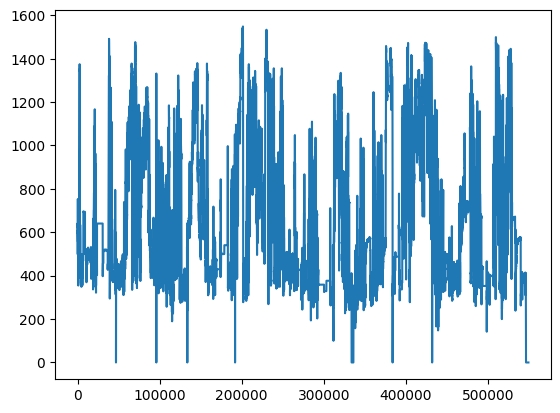

In [65]:
plt.plot(positions_total)

In [28]:
import numpy as np

# Fréquence d'échantillonnage et intervalle de binning
fs_positions = 160  # Fréquence d'échantillonnage des positions (Hz)
bin_interval = 0.005  # Intervalle de binning en secondes (5 ms)

# Calcul du nombre d'échantillons par bin en arrondissant au plus proche
samples_per_bin = round(bin_interval * fs_positions)

# Assurez-vous que le nombre d'échantillons par bin n'est pas zéro
if samples_per_bin > 0:
    binned_positions = [np.mean(clean_x_p[i:i + samples_per_bin]) 
                        for i in range(0, len(clean_x_p), samples_per_bin)]
    print("Binned Positions:", binned_positions)
else:
    print("L'intervalle de binning ou la fréquence d'échantillonnage sont trop bas pour obtenir un bin correct.")

Binned Positions: [909.0, 909.0, 909.0, 909.0, 909.0, 909.0, 909.0, 501.0, 501.0, 501.0, 501.0, 501.0, 501.0, 501.0, 501.0, 501.0, 501.0, 498.0, 498.0, 498.0, 504.0, 504.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 502.0, 502.0, 499.0, 499.0, 499.0, 499.0, 499.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 501.0, 501.0, 498.0, 498.0, 498.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 498.0, 4

In [29]:
len(binned_positions)

549167

In [30]:
len(features)

687642